In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
print(tf.__version__)

1.11.0


# Dataset Fashion MNIST

Conitene 70,000 imagenes en escala de grises de 10 diferentes categorias. Cada imagen tiene una resolución de 28X28

In [30]:
# Descargamos el data set
fashion_mnist = keras.datasets.fashion_mnist

In [31]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
test_images.shape

(10000, 28, 28)

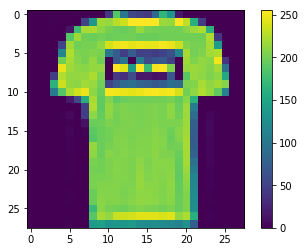

In [37]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [38]:
# Normalizamos los pixeles
train_images = train_images / 255.0

test_images = test_images / 255.0

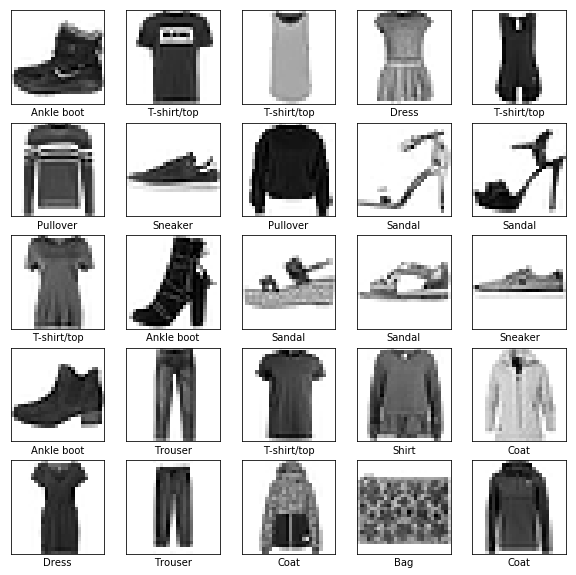

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [40]:
# Creamos nuetro modelos con Keras de manera secuencial

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [41]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2819 - acc: 0.8966
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2691 - acc: 0.9014
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2592 - acc: 0.9054
Epoch 4/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2501 - acc: 0.9069ETA: 0s - loss: 0.2489 - - ETA: 0s - loss: 0.2500 - acc: 
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2398 - acc: 0.9113
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2335 - acc: 0.9130
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2258 - acc: 0.9150
Epoch 8/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2189 - acc: 0.9179
Epoch 9/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2100 - acc: 0.9225
Epoch 10/10
60000/60000 [==================

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/step


In [44]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8597


In [45]:
predictions = model.predict(test_images)

In [53]:
predictions[0]

array([6.0978364e-05, 2.5581676e-07, 5.1057141e-06, 1.4812358e-07,
       2.7821222e-06, 5.3053018e-02, 6.0428774e-06, 6.9553137e-02,
       1.0110288e-05, 8.7730843e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [58]:
predictions[0][9]

0.8773084

In [49]:
test_labels[0]

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

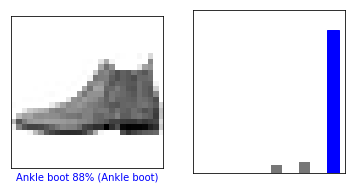

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

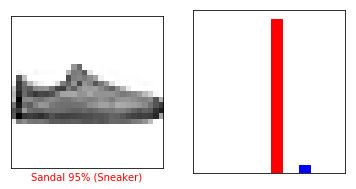

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

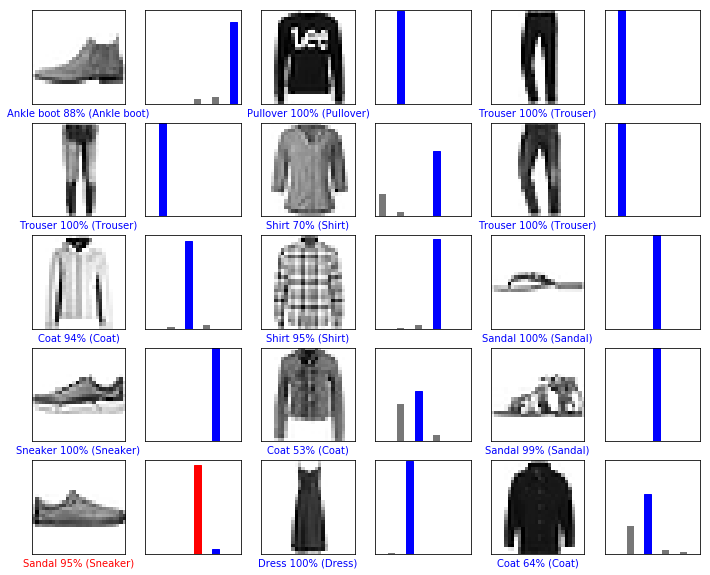

In [60]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [62]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)



(28, 28)


In [63]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


[[6.0978371e-05 2.5581653e-07 5.1057191e-06 1.4812331e-07 2.7821170e-06
  5.3053025e-02 6.0428665e-06 6.9553070e-02 1.0110289e-05 8.7730849e-01]]


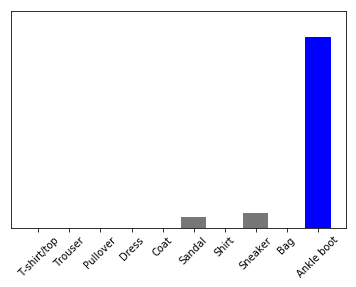

In [65]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)